In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv("D:\DSCT\Dataset\salary for Lin Reg.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

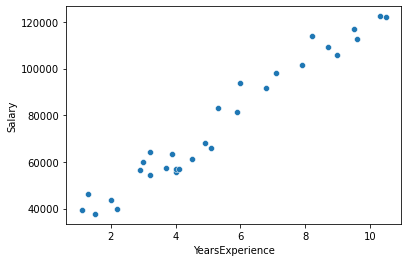

In [6]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])

In [10]:
ML_Model=KMeans(n_clusters=3)
X=df[['YearsExperience','Salary']]
cluster_predict_old=ML_Model.fit_predict(X)
cluster_predict_old

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1])

In [11]:
df['Old_cluster']=cluster_predict_old
df

,YearsExperience,Salary,Old_cluster
0,1.1,39343,0
1,1.3,46205,0
2,1.5,37731,0
3,2.0,43525,0
4,2.2,39891,0
5,2.9,56642,0
6,3.0,60150,0
7,3.2,54445,0
8,3.2,64445,0
9,3.7,57189,0


In [13]:
df0=df[df['Old_cluster']==0]
df1=df[df['Old_cluster']==1]
df2=df[df['Old_cluster']==2]

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

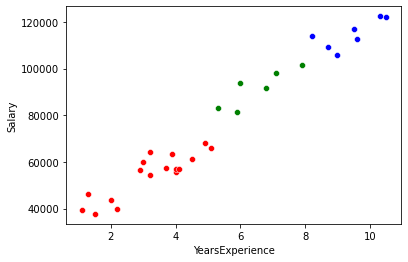

In [14]:
sns.scatterplot(x=df0['YearsExperience'],y=df['Salary'],color="red")
sns.scatterplot(x=df1['YearsExperience'],y=df['Salary'],color="blue")
sns.scatterplot(x=df2['YearsExperience'],y=df['Salary'],color="green")

# Scaling (MinMaxScaler from Sklern)

In [16]:
Scaler_YearsExperience=MinMaxScaler()
Scaler_Salary=MinMaxScaler()

Scaler_YearsExperience.fit(df[['YearsExperience']])
Scaler_Salary.fit(df[['Salary']])

df['Scaled_YearsExperience']=Scaler_YearsExperience.transform(df[['YearsExperience']])
df['Scaled_Salary']=Scaler_Salary.transform(df[['Salary']])

print("------------------------Transformed Data----------------------------------")
df.head()

------------------------Transformed Data----------------------------------


,YearsExperience,Salary,Old_cluster,Scaled_YearsExperience,Scaled_Salary
0,1.1,39343,0,0.000000,0.019041
1,1.3,46205,0,0.021277,0.100094
2,1.5,37731,0,0.042553,0.000000
3,2.0,43525,0,0.095745,0.068438
4,2.2,39891,0,0.117021,0.025514


<AxesSubplot:xlabel='Scaled_YearsExperience', ylabel='Scaled_Salary'>

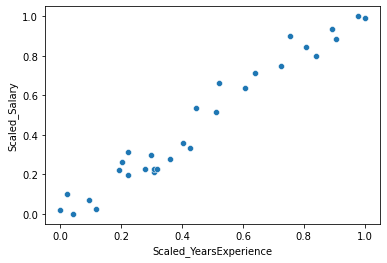

In [17]:
sns.scatterplot(x=df['Scaled_YearsExperience'],y=df['Scaled_Salary'])

In [18]:
X1=df[['Scaled_YearsExperience','Scaled_Salary']]
cluster_predict_new=ML_Model.fit_predict(X1)
cluster_predict_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
df["New_cluster"]=cluster_predict_new
df.head()

,YearsExperience,Salary,Old_cluster,Scaled_YearsExperience,Scaled_Salary,New_cluster
0,1.1,39343,0,0.000000,0.019041,1
1,1.3,46205,0,0.021277,0.100094,1
2,1.5,37731,0,0.042553,0.000000,1
3,2.0,43525,0,0.095745,0.068438,1
4,2.2,39891,0,0.117021,0.025514,1


In [20]:
df0=df[df['New_cluster']==0]
df1=df[df['New_cluster']==1]
df2=df[df['New_cluster']==2]

<AxesSubplot:xlabel='Scaled_YearsExperience', ylabel='Scaled_Salary'>

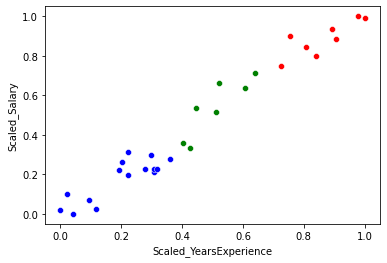

In [26]:
sns.scatterplot(x=df0['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="red")
sns.scatterplot(x=df1['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="blue")
sns.scatterplot(x=df2['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="green")

In [22]:
ML_Model.cluster_centers_

array([[0.86303191, 0.88906508],
       [0.19929078, 0.17935428],
       [0.50759878, 0.53702541]])

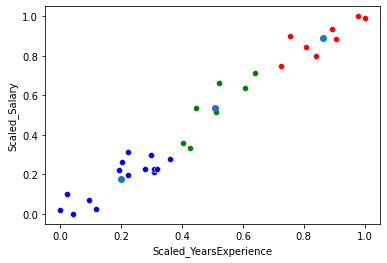

In [27]:
sns.scatterplot(x=df0['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="red")
sns.scatterplot(x=df1['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="blue")
sns.scatterplot(x=df2['Scaled_YearsExperience'],y=df['Scaled_Salary'],color="green")
plt.scatter(ML_Model.cluster_centers_[:,0],ML_Model.cluster_centers_[:,1])

# how to find perfect value for k

In [28]:
# create a model k=1,2,3,..15

SSE=[]
X=df[['Scaled_YearsExperience','Scaled_Salary']]

for k in range(1,16):
    # create Model
    ML_Model=KMeans(n_clusters=k)
    # model train
    ML_Model.fit(X)
    # find SSE
    sse=ML_Model.inertia_
    SSE.append(sse)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
SSE

[5.684101493731802,
 1.1964172294563447,
 0.6595353283667087,
 0.28565072238646344,
 0.20142103824997884,
 0.14621099079652466,
 0.11258261397197541,
 0.08576384962602343,
 0.07009171844141443,
 0.057170698914466765,
 0.047370269852570555,
 0.04097745755114232,
 0.03357201106532402,
 0.02910181648484152,
 0.024212972870848063]

Text(0, 0.5, 'SSE')

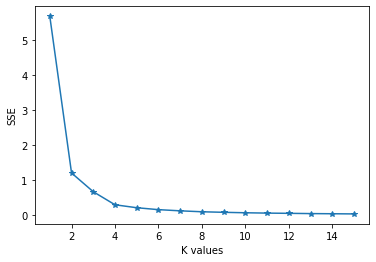

In [30]:
plt.plot(list(range(1,16)),SSE,'-*')
plt.xlabel("K values")
plt.ylabel("SSE")